In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Raw Data of Species and their current status.
df = pd.read_csv(r"C:\Users\monee\OneDrive\Documents\species_info.csv")
df.drop_duplicates(subset=['scientific_name'])
df
## After making sure there aren't duplicates, table shows that there are 5824 recorded species.

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [3]:
## Next is to find out how many different types of species are in the dataset

In [4]:
nos_df = df.groupby(['category'], as_index=False)['scientific_name'].count()
sorted_values = nos_df.sort_values('scientific_name')
sorted_values

## The results show that there are 7 types of species recorded and how many.
    # Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile, Vascular Plant

,category,scientific_name
5,Reptile,79
0,Amphibian,80
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
1,Bird,521
6,Vascular Plant,4470


In [5]:
## Visual Chart of the number of species that are in each category from above results.

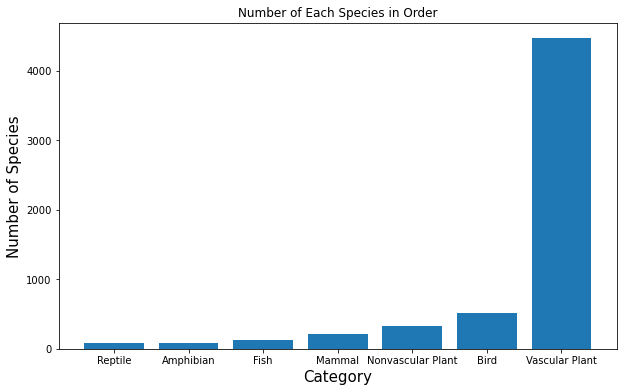

In [6]:
plt.figure(figsize=(10,6))
plt.bar(sorted_values['category'],sorted_values['scientific_name'])
plt.xlabel('Category', size = 15)
plt.ylabel('Number of Species', size=15)
plt.title('Number of Each Species in Order')
plt.savefig("num_of_each_species_bchart.png")
plt.show()

## This bar chart visually shows Vascular Plants being the most recorded with Reptile and then Amphibians being the least.

In [7]:
status_df =df.groupby(['conservation_status'], as_index=False)['category'].count()
status_df
# Records are missing in these results because null values cannot be read. 
# Therefore, null values in 'conservation_status need to be updated.'

,conservation_status,category
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


In [8]:
## Getting rid of Null values in dataframe.

df['conservation_status'] = df['conservation_status'].fillna('Stable')
# Now that Null Values are gone in 'conservation_status', we can repeat execution above.

new_stat = status_df.sort_values('category')
new_stat

# Results show that the majority of recorded species are stable and the least are in recovery

,conservation_status,category
1,In Recovery,4
3,Threatened,10
0,Endangered,16
2,Species of Concern,161


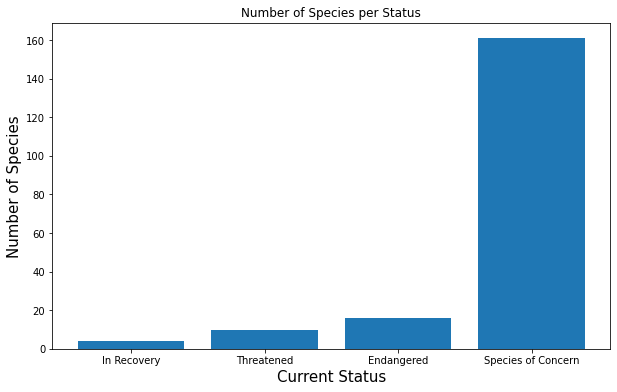

In [9]:
## Visual of number of species in each status.

plt.figure(figsize=(10,6))
plt.bar(new_stat['conservation_status'],new_stat['category'])
plt.xlabel('Current Status', size = 15)
plt.ylabel('Number of Species', size=15)
plt.title('Number of Species per Status')
plt.savefig("nos_status_bchart.png")
plt.show()

In [10]:
## The analyst between the first two graphs suggest that the majority of recorded species are Vascular Plants and are stable.
## This gives an obvious conclusion that most stable species are Vascular Plants.

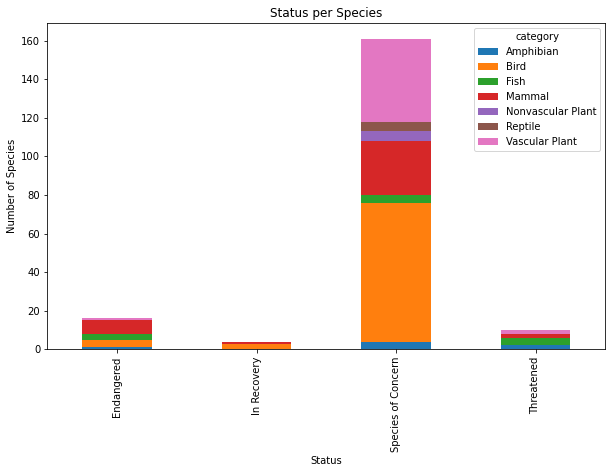

In [31]:
## Now that we know this. Let's find out what species are most likely to be Endangered/Threatened
status = df[df.conservation_status != "Stable"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

ax = status.plot(kind = 'bar', figsize=(10,6), stacked=True)
ax.set_xlabel("Status")
ax.set_ylabel('Number of Species')
ax.set_title('Status per Species')
plt.savefig("stat_spec_stack.png")

#This chart shows that the mammals are the ones that are most likely endangered

In [25]:
# Data for each species Observation and park location
df2 = pd.read_csv(r"C:\Users\monee\OneDrive\Documents\observations.csv")
df2.drop_duplicates(subset=['scientific_name'])
df2
# Cleaned Data of Observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [28]:
o_df = df2.groupby(['park_name'], as_index=False)['scientific_name'].count()
o_df

#Chart of how many species are at each park

,park_name,scientific_name
0,Bryce National Park,5824
1,Great Smoky Mountains National Park,5824
2,Yellowstone National Park,5824
3,Yosemite National Park,5824


In [ ]:
## Chart shows that species are divided evenly at four parks. Which suggests that each species were recorded four times.

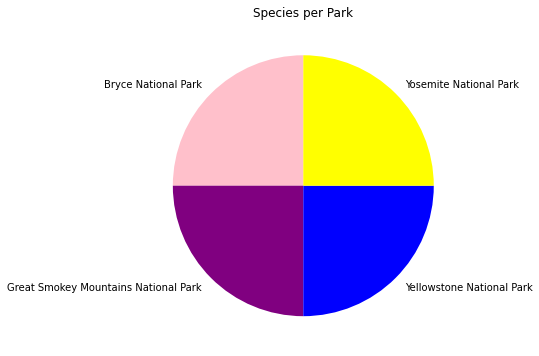

<Figure size 432x288 with 0 Axes>

In [35]:
# Visual of chart

parks = ["Bryce National Park", "Great Smokey Mountains National Park", "Yellowstone National Park", "Yosemite National Park"]
animals = [5824,5824,5824,5824]

plt.figure(figsize=(10,6))
plt.pie(animals, labels=parks, colors=["pink","purple","blue","yellow"],startangle=90)
plt.title("Species per Park")
plt.show()
plt.savefig("spec_park_pie.png")

In [26]:
## To find out more about the endangered mammals at the park, I will join the table with common names.